In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [5]:
f = open("experiement_results_15_12_26.json")

data = json.load(f)

metrics = data["metrics"]

is_discrete_simulation = data["time_control"]["type"] == "discrete"

amount_of_steps = 0
time_step = 0
if is_discrete_simulation:
    amount_of_steps = data["time_control"]["time_data"]["number_of_steps"]
    time_step = data["time_control"]["time_data"]["time_step"]

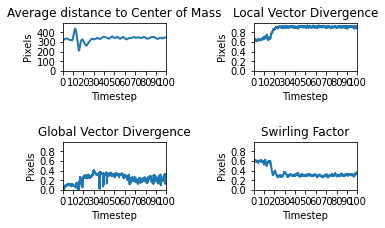

In [14]:
if is_discrete_simulation:
       # make data
       x = np.linspace(0, amount_of_steps * time_step, amount_of_steps)
       y = [np.array(data["metrics"]["avg_dist_to_com"]), np.array(data["metrics"]["global_vec_divergence"]), np.array(data["metrics"]["local_vec_divergence"]), np.array(data["metrics"]["swirling_factor"])]
       y_size = [(0,500,100, "Average distance to Center of Mass"), (0,1,0.2, "Global Vector Divergence"),(0,1,0.2, "Local Vector Divergence"),(0,1,0.2,"Swirling Factor")]
       fig, ax = plt.subplots(2, 2)
       fig.tight_layout(h_pad=5)
       for i in range(4):
              ix = i % 2
              iy = i // 2

              ax[ix,iy].plot(x, y[i], linewidth=2.0)

              ax[ix,iy].set(xlim=(0, 10), xticks=np.arange(0, amount_of_steps * time_step + 1, amount_of_steps * time_step / 10),
                     ylim=(0, y_size[i][1]), yticks=np.arange(y_size[i][0], y_size[i][1] , y_size[i][2]))
              ax[ix, iy].set_title(y_size[i][3])
              ax[ix, iy].set_xlabel("Timestep")
              ax[ix, iy].set_ylabel("Pixels")

       plt.show()